In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/sf/whvty1j57cxcxs3t3mhwbcgh0000gn/T/ipykernel_1156/2660915427.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### 1 - Read this CSV into a DataFrame called df and convert any timestamp columns into DateTime types.

In [2]:
citi_url="data/citibike_sample.csv"

In [3]:
df = pd.read_csv(citi_url)

In [4]:
#Convert any and all timestamp data to datetime data types
df['stoptime'] = pd.to_datetime(df['stoptime']) 
df['starttime'] = pd.to_datetime(df['starttime'])

#### 2a - Create a scatter plot with distance_miles on the x-axis and tripduration_minutes on the y-axis. Leave the chart default setting as they are.

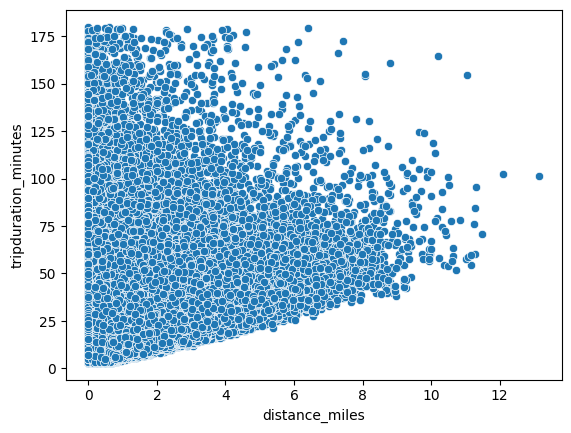

In [5]:
sns.scatterplot(data=df, x="distance_miles", y="tripduration_minutes");

#### 2b - Create another scatter plot similar to the one above, this time with alpha=0.1 to make the dots highly transparent.

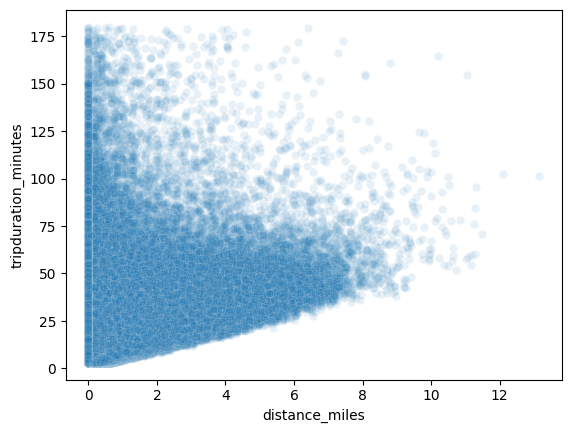

In [6]:
sns.scatterplot(data=df, x="distance_miles", y="tripduration_minutes", alpha=0.1);

#### 2c - Create another scatter plot similar to the one above, this time with alpha=0.01 to make the dots even more highly transparent.

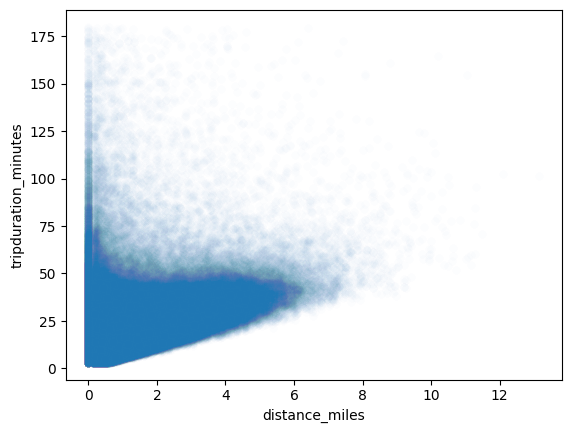

In [7]:
sns.scatterplot(data=df, x="distance_miles", y="tripduration_minutes", alpha=0.01);

#### 2d - Which of the above three scatter plots is most useful? What are some benefits and potential drawbacks to making the dots in a scatter plot highly transparent?
As the dots become more and more transparent, the data starts to take on a more definite shape. You can see densely concentrated regions of the chart where lots of overlapping variables occur and the association between distance and trip duration starts to appear. In all of them, you can observe the time "floor," where there is no possible way to go a certain distance in less time than this point; however, only in the more transparent scatterplots can you observe what could be an approximate bivariate relationship, and the spikes in the data, such as the longest trips at the 0 distance point, where the longest trips are the round trips. However, outliers are harder to observe with more transparency.

#### 2e - Create a joint plot with distance_miles on the x-axis and tripduration_minutes on the y-axis. Set kind='scatter' and alpha=0.01. How is this joint plot different from the scatter plot in Problem 2b? What benefits does a joint plot have compared to a regular scatter plot?
The joint plot allows us to see the two univariate histogram distributions of the two datasets alongside the scatterplot summary of their association with each other. The bivariate scatterplot might miss some of the outliers, but these can be observed in the histograms.

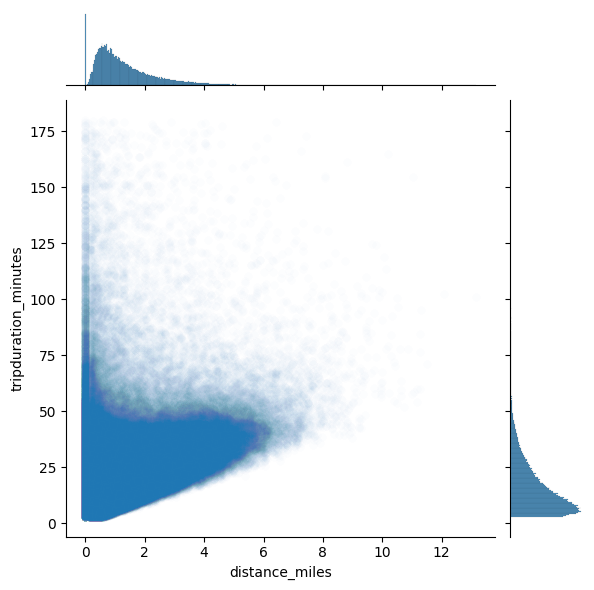

In [9]:
sns.jointplot(data=df, x="distance_miles", y="tripduration_minutes", kind='scatter', alpha=0.01);

#### 2f - Create another joint plot similar to the previous one, with kind='hex' and alpha=1.

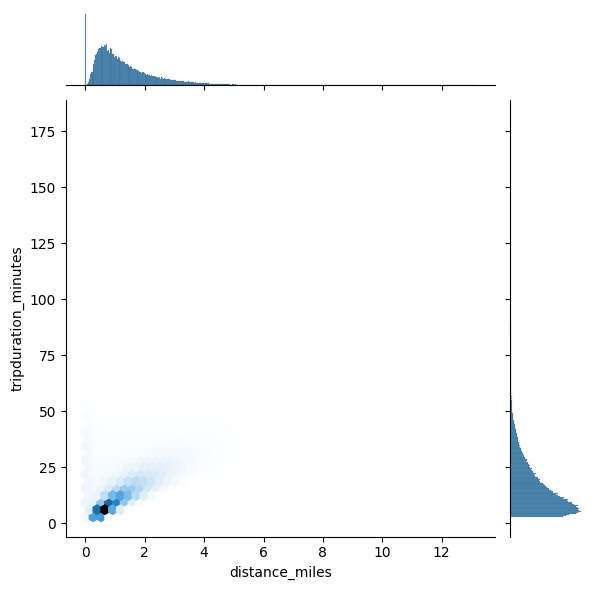

In [5]:
sns.jointplot(data=df, x="distance_miles", y="tripduration_minutes", kind='hex', alpha=1);

#### 2g - Create another joint plot similar to the previous one. This time, set kind='kde', alpha=0.7, and shade='fill'...on a random sample of just 10,000 rows taken from df instead of the entire DataFrame.

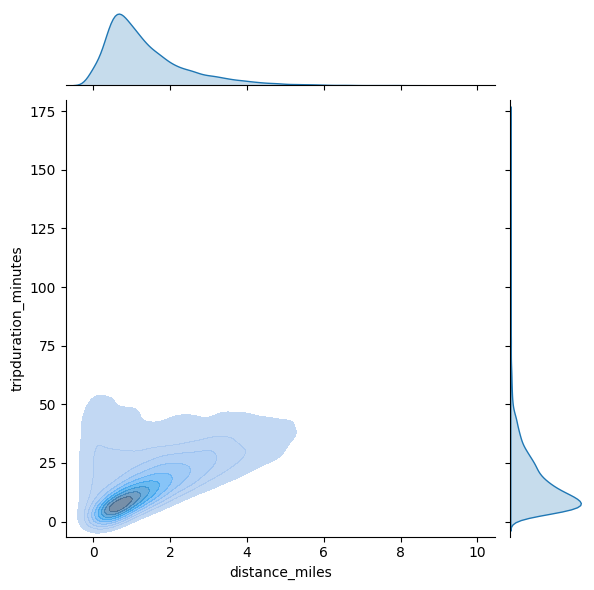

In [6]:
sns.jointplot(data=df.sample(10000), x="distance_miles", y="tripduration_minutes", 
              kind='kde', alpha=0.7, fill='fill'); #"fill" works instead of "shade" in my version

#### 2h - Of the several bivariate charts that you have created for this problem, which chart or combination of charts do you think is most effective at visualizing the empirical relationship between distance and trip duration? Why?
I think that the joint plot with kde type is most useful overall, if we are not concerned that much with all of the outliers in the larger dataset and just want to be able to see the two major areas of bivariate associations. Otherwise, I think the joint plot with scatterplot type gets at everything fairly well - the overall associate, the general concentrations of the dataset, and the outliers.

#### 3a - Calculate the linear correlation coefficient between distance and trip duration using Pearson’s r statistic. Interpret your result. What does it say about the strength and direction of the relationship between these two variables?
There is a positive correlation at 0.4570007; when the distance increases, trip duration also increases overall and vice versa. Perfect correlation would be 1, and no correlation would be zero, so this is a middling correlation relative to that range.

In [7]:
df[['distance_miles', 'tripduration_minutes']].corr(method='pearson')

,distance_miles,tripduration_minutes
distance_miles,1.000000,0.457007
tripduration_minutes,0.457007,1.000000


#### 3b - Calculate the monotonic correlation coefficient between distance and trip duration using Spearman’s ρ statistic. Interpret your result. What does it say about the strength and direction of the relationship between these two variables?
Again there is a positive correlation at 0.61076, and this correlation lies closer to 1 than to 0, so it indicates a stronger positive correlation using Spearman's ρ; when the distance increases, trip duration also increases and vice versa.

In [8]:
df[['distance_miles', 'tripduration_minutes']].corr(method='spearman')

,distance_miles,tripduration_minutes
distance_miles,1.00000,0.61076
tripduration_minutes,0.61076,1.00000


#### 3c - How does the strength and direction of the linear correlation coefficient from 3a) compare to the monotonic correlation coefficient from 3b)? If you observe a difference, can you think of any potential causal factors which might explain it?
This is likely a non-linear function, meaning the Pearson's r is missing some detail by trying to force this data into a linear relationship. The monotonic correlation coefficient more specifically gets at the underlying empirical association in this case, which is reflected in the correlation calculating as a stronger value with Spearman's ρ than with Pearson's r. This is probably due to Spearman's ρ working more robustly with outliers, and this dataset does appear to have both many outliers as well as a long tail in the distribution that would skew the Pearson's r line of best fit.

#### 3d - There are a lot trips with zero or near zero origin to destination distance, which could have an impact on the correlation coefficients. Drop trips with distance less than 0.1 miles and calculate the monotonic correlation on the remaining subset of trips. Does Spearman’s ρ change when you only consider trips with distance of 0.1 mile or greater, compared trips of all distances? If so, what does this suggest?
The correlation coefficient has grown even stronger in the positive direction when removing distances less than 0.1, showing that these 0-distance trips are potentially skewing the data to make the overall relationship less strong.

In [11]:
df_droppedtrips = df.query("distance_miles >= .1")
df_droppedtrips[['distance_miles', 'tripduration_minutes']].corr(method='spearman')

,distance_miles,tripduration_minutes
distance_miles,1.000000,0.713443
tripduration_minutes,0.713443,1.000000


#### 3e - Calculate the monotonic correlation between distance and duration as you did in 3d) (continuing to exclude trips with distance less than 0.1 mile), but this time group by user_type. In other words, calculate a separate Spearman’s ρ coefficient for each user_type. How does the monotonic correlation coefficient for Subscribers compare to the same statistic for Customers? How do each of these grouped correlations compare to overall correlation which you calculated in 3d)?
Customer correlation with Spearman's ρ is positive (.572411) but middling and overall less than the overall correlation in the dataset calculated above. Subscriber monotonic correlation, on the other hand, is overall stronger in the positive direction than both Customers and that of the overall dataset (at .754251).

In [12]:
df_droppedtrips[['distance_miles', 'tripduration_minutes', 
    'usertype']].groupby('usertype').corr(method='spearman')

distance_miles  tripduration_minutes
usertype                                                             
Customer   distance_miles              1.000000              0.572411
           tripduration_minutes        0.572411              1.000000
Subscriber distance_miles              1.000000              0.754251
           tripduration_minutes        0.754251              1.000000

#### 3f - Calculate the monotonic correlation between distance and duration as you did in 3d) (continuing to exclude trips with distance less than 0.1 mile), but this time group by starttime_hour. In other words, calculate 24 separate Spearman’s ρ coefficients, one for each hour of the day. Visualize this set of coefficients as a line plot, with the coefficient on the y-axis and starttime_hour on the x-axis.

In [25]:
#group correlation by starttime_hour
#calculate 24 separate Spearman’s ρ coefficients, one for each hour of the day
starttime_corr = df_droppedtrips[['distance_miles', 'tripduration_minutes', 
    'starttime_hour']].groupby('starttime_hour').corr(method='spearman')
starttime_corr

distance_miles  tripduration_minutes
starttime_hour                                                           
0              distance_miles              1.000000              0.677688
               tripduration_minutes        0.677688              1.000000
1              distance_miles              1.000000              0.642844
               tripduration_minutes        0.642844              1.000000
2              distance_miles              1.000000              0.598449
               tripduration_minutes        0.598449              1.000000
3              distance_miles              1.000000              0.669845
               tripduration_minutes        0.669845              1.000000
4              distance_miles              1.000000              0.752769
               tripduration_minutes        0.752769              1.000000
5              distance_miles              1.000000              0.816091
               tripduration_minutes        0.816091              1.000000
6              distance_miles              1.000000              0.862844
               tripduration_minutes        0.862844              1.000000
7              distance_miles              1.000000              0.835589
               tripduration_minutes        0.835589              1.000000
8              distance_miles              1.000000              0.823013
               tripduration_minutes        0.823013              1.000000
9              distance_miles              1.000000              0.795276
               tripduration_minutes        0.795276              1.000000
10             distance_miles              1.000000              0.745012
               tripduration_minutes        0.745012              1.000000
11             distance_miles              1.000000              0.723633
               tripduration_minutes        0.723633              1.000000
12             distance_miles              1.000000              0.709105
               tripduration_minutes        0.709105              1.000000
13             distance_miles              1.000000              0.707359
               tripduration_minutes        0.707359              1.000000
14             distance_miles              1.000000              0.692721
               tripduration_minutes        0.692721              1.000000
15             distance_miles              1.000000              0.690128
               tripduration_minutes        0.690128              1.000000
16             distance_miles              1.000000              0.690846
               tripduration_minutes        0.690846              1.000000
17             distance_miles              1.000000              0.712232
               tripduration_minutes        0.712232              1.000000
18             distance_miles              1.000000              0.719535
               tripduration_minutes        0.719535              1.000000
19             distance_miles              1.000000              0.708112
               tripduration_minutes        0.708112              1.000000
20             distance_miles              1.000000              0.669637
               tripduration_minutes        0.669637              1.000000
21             distance_miles              1.000000              0.645374
               tripduration_minutes        0.645374              1.000000
22             distance_miles              1.000000              0.666118
               tripduration_minutes        0.666118              1.000000
23             distance_miles              1.000000              0.659480
               tripduration_minutes        0.659480              1.000000

In [35]:
starttime_corr = starttime_corr.query("distance_miles != 1") 
#starttime_corr = starttime_corr.query("tripduration_minutes != 1")
starttime_corr

,,distance_miles,tripduration_minutes
starttime_hour,,,
0,tripduration_minutes,0.677688,1.0
1,tripduration_minutes,0.642844,1.0
2,tripduration_minutes,0.598449,1.0
3,tripduration_minutes,0.669845,1.0
4,tripduration_minutes,0.752769,1.0
5,tripduration_minutes,0.816091,1.0
6,tripduration_minutes,0.862844,1.0
7,tripduration_minutes,0.835589,1.0
8,tripduration_minutes,0.823013,1.0


In [41]:
# Visualize this set of coefficients as a line plot, with the coefficient on the y-axis and 
# starttime_hour on the x-axis.                                        

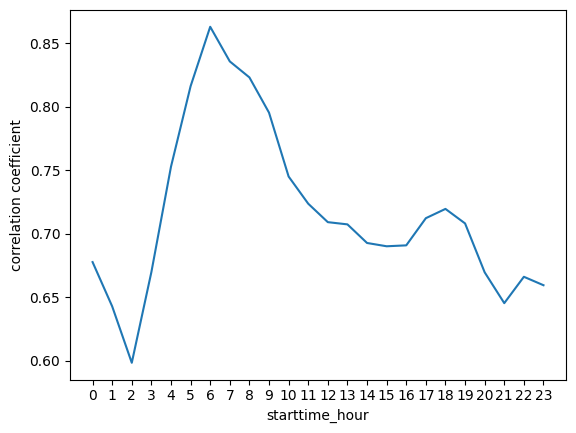

In [42]:
sns.lineplot(data=starttime_corr, x= "starttime_hour", y= "distance_miles").set_xticks(range(24));
plt.ylabel('correlation coefficient');

#### 3f - What does this line plot suggest about how the correlation between distance and duration changes throughout the day? Can you think of any factors which might explain this phenomenon?
The strongest spike positive correlation occurs just after 6am, drops off until just after 5 or 6pm when there is another, lower spike. These times correspond to the morning and evening commute, and may suggest that people are more likely to take citibikes straight to their work destination in the morning and possibly opt for a different mode of transportation on their return trip home in the evening, or are making stops on their way home for dinner or errands, making their trip durations and distances less strongly positively correlated.